In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
import PIL

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/148180650_19a4b410db.jpg'),
 PosixPath('datasets/flower_photos/dandelion/140951103_69847c0b7c.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3585220976_5acac92d1c.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3509307596_6cfe97867d_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/9200211647_be34ce978b.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5961803532_9368212949_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16552686350_db8db55cd2.jpg'),
 PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4809566219_88f9a1aea3.jpg'),
 PosixPath('datasets/flower_photos/roses/3422228549_f147d6e642.jpg')]

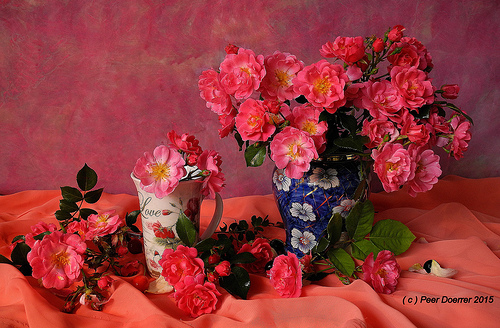

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
tulips = list(data_dir.glob('tulips/*'))

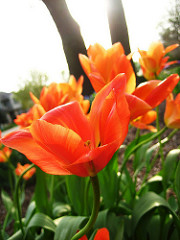

In [12]:
PIL.Image.open(str(tulips[0]))

## **Read flowers images from disk into numpy array using opencv**

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5961803532_9368212949_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16552686350_db8db55cd2.jpg'),
 PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4809566219_88f9a1aea3.jpg'),
 PosixPath('datasets/flower_photos/roses/3422228549_f147d6e642.jpg')]

In [16]:

str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5961803532_9368212949_m.jpg'

In [17]:
import cv2

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(240, 240, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:

X, y = [], []

In [22]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)


## **Train test split**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## **Preprocessing: scale images**

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## **Build convolutional neural network and train it**

---



In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
num_classes = 5

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3108 - loss: 1.5861
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 995ms/step - accuracy: 0.5131 - loss: 1.1372
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 85s 993ms/step - accuracy: 0.6339 - loss: 0.9321
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7282 - loss: 0.7222
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8046 - loss: 0.5403
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 1000ms/step - accuracy: 0.8884 - loss: 0.3380
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9506 - loss: 0.1811
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9770 - loss: 0.0951
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 965ms/step - accuracy: 0.9916 - loss: 0.0417
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9851 - loss: 0.0513
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9874 - loss: 0.0553
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - a

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 0.6601 - loss: 2.4461


[2.475917339324951, 0.6535947918891907]


**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.66%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [34]:
predictions = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step


In [35]:
predictions

array([[8.89361894e-15, 9.99989331e-01, 1.06660827e-05, 8.40918307e-12,
        1.62407446e-12],
       [8.54976714e-01, 1.63078138e-08, 3.13283497e-13, 9.65120995e-13,
        1.45023346e-01],
       [1.45319432e-01, 3.25717079e-03, 7.80649304e-01, 2.14950196e-05,
        7.07525760e-02],
       ...,
       [7.07025757e-11, 1.27655317e-08, 9.77754212e-07, 8.87124717e-01,
        1.12874344e-01],
       [1.50064928e-02, 8.94088414e-04, 4.86124307e-10, 7.50355241e-07,
        9.84098732e-01],
       [3.00731120e-13, 2.73816747e-09, 6.28021226e-08, 9.99999762e-01,
        7.53703020e-08]], dtype=float32)

In [36]:
score = tf.nn.softmax(predictions[0])


In [37]:
np.argmax(score)

1

In [38]:
y_test[0]

1

## **Improve Test Accuracy Using Data Augmentation**

In [39]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [40]:
data_augmentation = Sequential()

In [41]:
data_augmentation.add(RandomFlip('horizontal', input_shape=(180, 180, 3)))
data_augmentation.add(RandomRotation(0.1))
data_augmentation.add(RandomZoom(0.1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


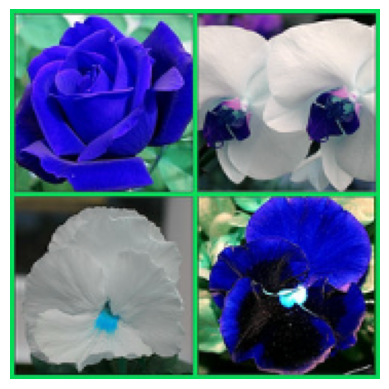

In [42]:
# Original Image
plt.axis('off')
plt.imshow(X[0])

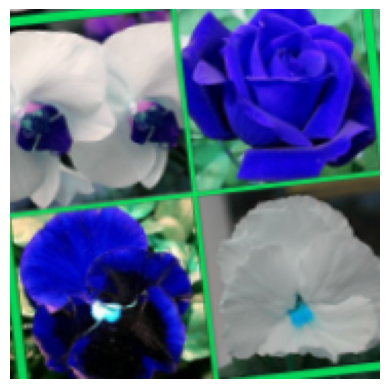

In [43]:
# Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## **Train the model using data augmentation and a drop out layer**

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
num_classes = 5

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(16, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3240 - loss: 1.5821
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5931 - loss: 1.0544
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6841 - loss: 0.8272
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7645 - loss: 0.6694
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8621 - loss: 0.4290
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9133 - loss: 0.2638
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9577 - loss: 0.1453
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9758 - loss: 0.0884
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9651 - loss: 0.1014
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9867 - loss: 0.0547
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9939 - loss: 0.0295
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.

In [50]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - accuracy: 0.6214 - loss: 2.6346


[2.631226062774658, 0.6252723336219788]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 65.06%**